In [1]:
import os
from datetime import datetime

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Make sure plots show in the notebook
%matplotlib inline

# Define ticker and dates
ticker = "^GSPC"  # S&P 500 index
start_date = "2020-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

print(f"Downloading data for {ticker} from {start_date} to {end_date}...")

data = yf.download(ticker, start=start_date, end=end_date)

print("Downloaded shape:", data.shape)
data.head()


C:\Users\Livkorg\AppData\Local\Temp\ipykernel_25300\92741802.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Downloaded shape: (1494, 5)


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000


In [2]:
# Ensure the raw data folder exists
raw_dir = "../02_Data/Raw"
os.makedirs(raw_dir, exist_ok=True)

raw_path = os.path.join(raw_dir, "sp500_prices_raw.csv")

# Reset index so Date becomes a column
data_reset = data.reset_index()
data_reset.to_csv(raw_path, index=False)

print("Saved raw data to:", raw_path)
data_reset.head()


Saved raw data to: ../02_Data/Raw\sp500_prices_raw.csv


Price,Date,Close,High,Low,Open,Volume
Ticker,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
0,2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
1,2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2,2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
3,2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
4,2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000


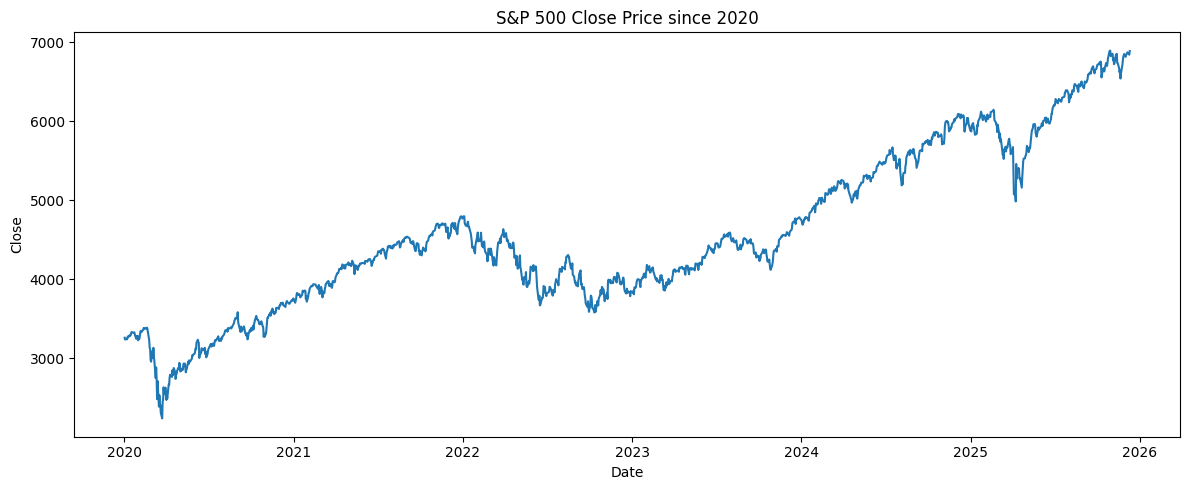

In [3]:
plt.figure(figsize=(12, 5))
plt.plot(data_reset["Date"], data_reset["Close"])
plt.title("S&P 500 Close Price since 2020")
plt.xlabel("Date")
plt.ylabel("Close")
plt.tight_layout()
plt.show()


In [4]:
print("Date range:", data_reset["Date"].min(), "to", data_reset["Date"].max())
print("Number of rows:", len(data_reset))

# Look for missing values
print("\nMissing values per column:")
print(data_reset.isna().sum())


Date range: 2020-01-02 00:00:00 to 2025-12-10 00:00:00
Number of rows: 1494

Missing values per column:
Price   Ticker
Date              0
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64


In [5]:
import pandas as pd

clean_path = "../02_Data/Processed/sp500_prices_clean.csv"
df_clean = pd.read_csv(clean_path)

df_clean.head()


,Date,Close,High,Low,Open,Volume,log_return,ma_5,ma_20,rolling_vol_20
0,2020-01-31,3225.520020,3282.330078,3214.679932,3282.330078,4.529700e+09,-0.017864,3260.489941,3279.220496,0.007441
1,2020-02-03,3248.919922,3268.439941,3235.659912,3235.659912,3.760460e+09,0.007228,3261.547949,3279.923987,0.007463
2,2020-02-04,3297.590088,3306.919922,3280.610107,3280.610107,3.996900e+09,0.014869,3265.817969,3282.489490,0.008129
3,2020-02-05,3334.689941,3337.580078,3313.750000,3324.909912,4.121480e+09,0.011188,3278.075977,3287.364990,0.008401
4,2020-02-06,3345.780029,3347.959961,3334.389893,3344.919922,3.887250e+09,0.003320,3290.500000,3292.001489,0.008375


In [6]:
print(df_clean.columns.tolist())
print("Number of rows:", len(df_clean))


['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'log_return', 'ma_5', 'ma_20', 'rolling_vol_20']
Number of rows: 1474
